# ML based clustering
Gonna try to do some ML based clustering to see if we can use it to do source detection.
Maybe it will work, maybe not... 

In [1]:
from astropy.table import Table
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = Table.read('./data_sim/13802_swift_xrt.fits')
data = data.to_pandas()

In [3]:
data

,TIME,X,Y,PHA,PI,DETX,DETY
0,3.231020,480,525,1149,290,480,525
1,3.788724,499,498,2644,668,499,498
2,11.652751,690,466,3166,800,690,466
3,13.668379,512,403,1849,467,512,403
4,16.624559,487,544,801,202,487,544
5,16.810448,297,376,3712,938,297,376
6,29.622511,509,519,1952,493,509,519
7,30.588205,615,410,493,124,615,410
8,32.791406,690,710,1418,358,690,710
9,41.788543,539,477,2802,708,539,477


Filter on the energy

In [4]:
d2 = data.loc[(50 < data.PI) & (data.PI < 200)] 

In [5]:
d2

,TIME,X,Y,PHA,PI,DETX,DETY
7,30.588205,615,410,493,124,615,410
11,48.667979,554,517,402,101,554,517
12,52.965750,653,697,754,190,653,697
18,105.805148,485,492,584,147,485,492
30,156.439957,482,453,525,132,482,453
47,292.332487,505,560,675,170,505,560
51,301.826737,486,640,513,129,486,640
56,357.058592,484,642,216,54,484,642
61,392.461969,488,484,552,139,488,484
69,471.238844,565,518,639,161,565,518


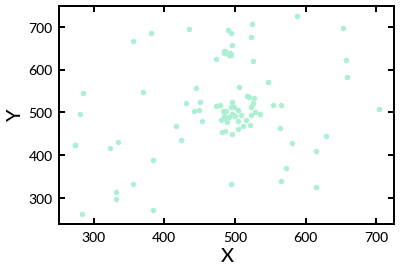

In [6]:
d2.plot.scatter('X', 'Y')

gonna try DBSCAN first

In [7]:
evts = d2[['X', 'Y']].values

In [8]:
evts.shape

(88, 2)

In [9]:
db = DBSCAN(eps=30, min_samples=10).fit(evts)

In [10]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [11]:
n_clusters_

2

0
1
-1


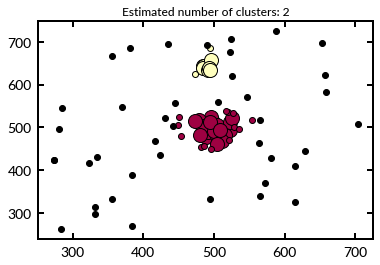

In [12]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    print(k)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = evts[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = evts[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [13]:
core_samples_mask

array([False, False, False,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False,  True, False,  True,  True, False, False])

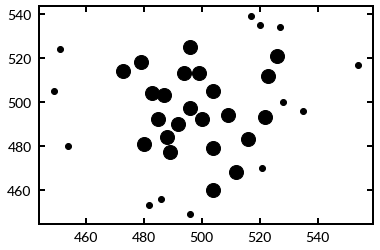

In [14]:
k = 0

class_member_mask = (labels == k)

xy = evts[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=14)

xy = evts[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)


Find the centroids of the "cluster". Seems to work right like we expect. It gives us a good center (truth is 500,500) and some reasonable RMSs for the position.

In [29]:
d2[class_member_mask & core_samples_mask]['X'].mean()

498.30434782608694

In [30]:
d2[class_member_mask & core_samples_mask]['Y'].mean()

496.4347826086956

In [33]:
np.sqrt(np.mean(d2[class_member_mask & core_samples_mask]['X'].values))

22.322731638983768

In [40]:
np.sqrt(np.mean((d2[class_member_mask & core_samples_mask]['X'].values - 500)**2))

14.549764677612934

In [41]:
np.sqrt(np.mean((d2[class_member_mask & core_samples_mask]['Y'].values - 500)**2))

17.370639897101736

Draw a circle (or ellipse) that should incompass the whole "cluster". This gives us an idea about the region we should exclude when we are trying to calculate the backgrounds. The ellipse didn't work so well when I tried it.

In [47]:
from matplotlib.patches import Ellipse, Circle

(444.5, 543.5)

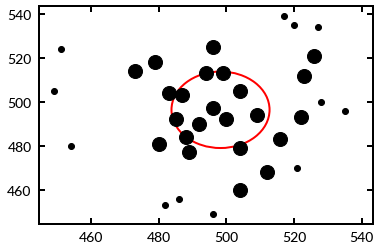

In [60]:
k = 0

class_member_mask = (labels == k)

xy = evts[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=14)

xy = evts[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)

c = Ellipse((498.3, 496.4), 2*14.5,2*17.4, lw=2, color='red', fill=False)
ax = plt.gca()
ax.add_patch(c)
plt.xlim(plt.ylim())